<a href="https://colab.research.google.com/github/leocassiosilva/Analise-de-dados/blob/main/Atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória dos dados da covid

# Importações e Dados

In [52]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/metodos_quantitativos/analise_dados_covid19/dataset.csv', engine='python')
df.head()


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


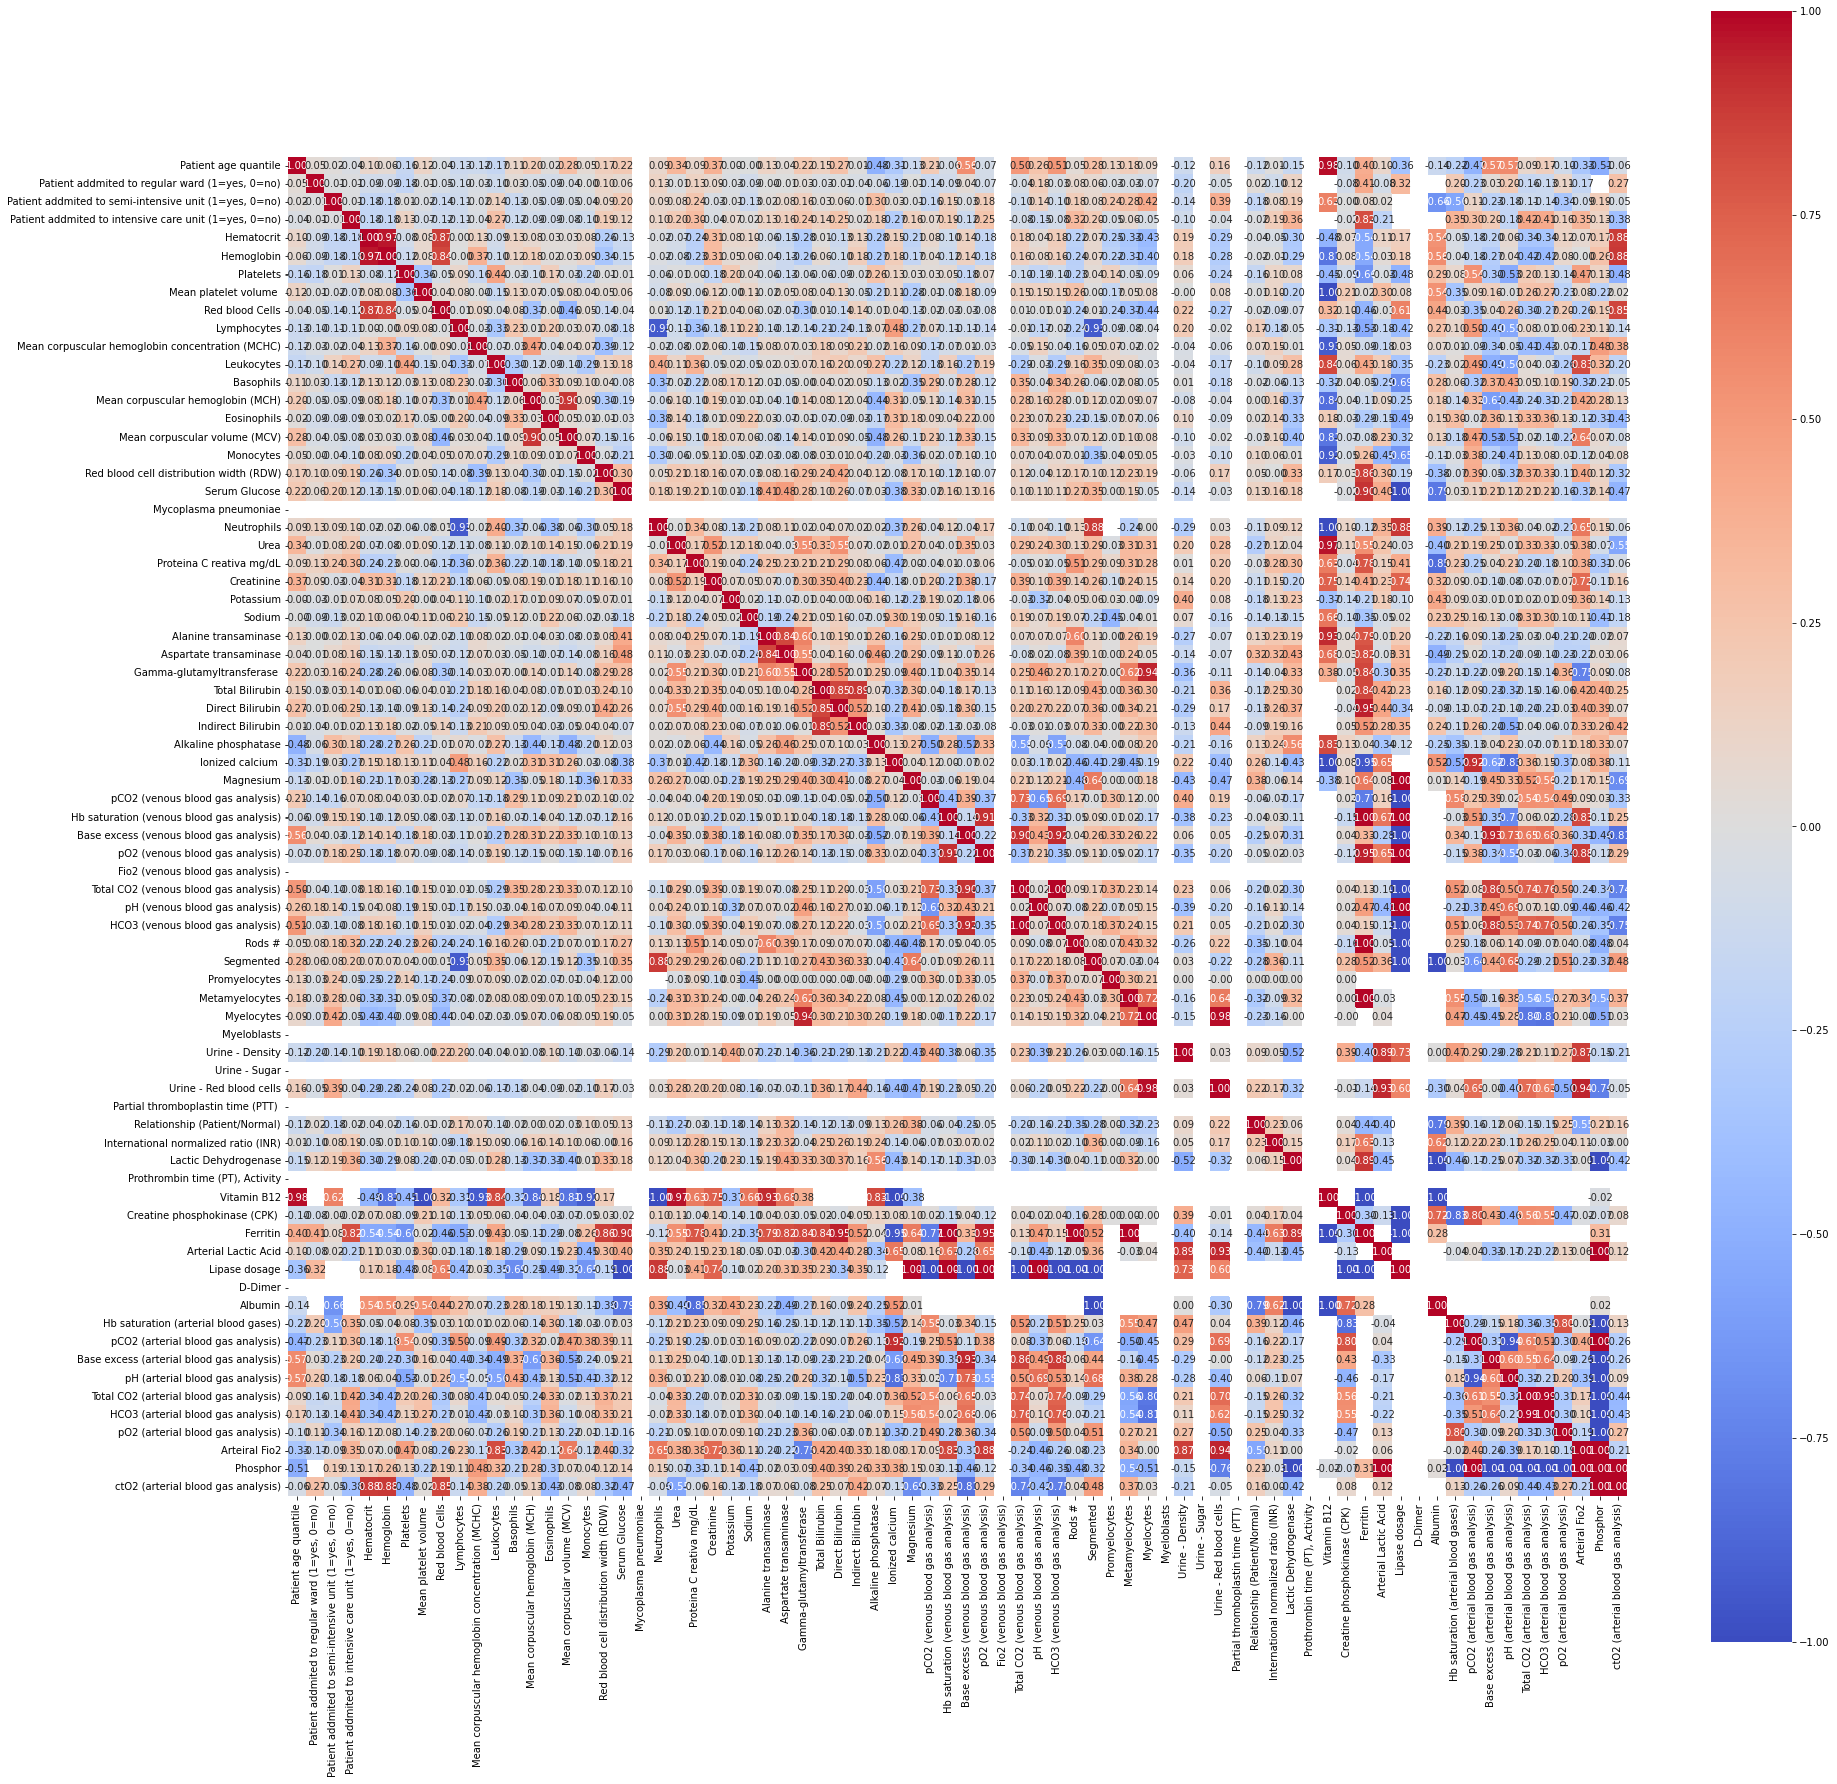

In [53]:
correlacao = df.corr()
plt.figure(figsize=(30,30))

sns.heatmap(correlacao, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 10}, cmap='coolwarm')
plt.show()

# Tipos de dados

In [4]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

# Exames SARS-covid-19


In [5]:
#informações referêntes aos exames do covid 
exame_result = df['SARS-Cov-2 exam result']
exame_result

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
5639    positive
5640    negative
5641    negative
5642    negative
5643    positive
Name: SARS-Cov-2 exam result, Length: 5644, dtype: object

In [ ]:
#Qual a quantidade de exames e seu respectivo resultado? 
exameResult = exame_result.value_counts()
exameResult

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

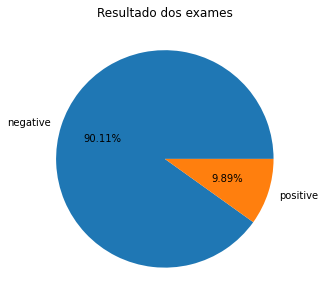

In [ ]:
#Qual a porcentagem do resultado dos exames de SARS-Cov
exameResult.plot(kind='pie', figsize=(5,5), autopct="%0.2f%%", label='', title="Resultado dos exames")


In [ ]:
#Selecionando as colunas do resultado e de plaquetas
colunasSelecionadas = ['SARS-Cov-2 exam result', 'Platelets']


In [ ]:
#Fazendo a filtragem das colunas selecionadas
microdadosCovidExame = df.filter(items=colunasSelecionadas)
microdadosCovidExame.head()

,SARS-Cov-2 exam result,Platelets
0,negative,NaN
1,negative,-0.517413
2,negative,NaN
3,negative,NaN
4,negative,NaN


In [ ]:
#Retirando os dados Not-a-Number
microdadosCovidExame = microdadosCovidExame.dropna()
microdadosCovidExame[0:40]

,SARS-Cov-2 exam result,Platelets
1,negative,-0.517413
8,negative,1.429667
15,negative,-0.429480
18,negative,0.072992
22,negative,-0.668155
28,negative,-0.178244
29,negative,0.361914
30,negative,0.952319
32,negative,0.072992
34,negative,-0.278739


In [ ]:
#Quantidade de exames positivos e negativos mediante a plaelets
microdadosCovidExame.groupby('SARS-Cov-2 exam result').count()

,Platelets
SARS-Cov-2 exam result,
negative,519
positive,83


In [ ]:
#Valor maximo de plaelets
microdadosCovidExame.groupby('SARS-Cov-2 exam result').max()

,Platelets
SARS-Cov-2 exam result,
negative,9.532034
positive,1.756275


In [ ]:
#Valor minimo de plaelets
microdadosCovidExame.groupby('SARS-Cov-2 exam result').min()

,Platelets
SARS-Cov-2 exam result,
negative,-2.552426
positive,-2.062515


SARS-Cov-2 exam result
negative    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
positive    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

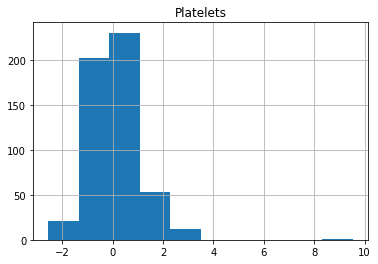

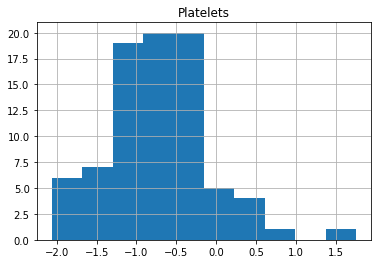

In [ ]:
#Histograma
microdadosCovidExame.groupby('SARS-Cov-2 exam result').hist()

In [ ]:
microdadosCovidExame.groupby('SARS-Cov-2 exam result').describe()

Platelets           ...                    
                           count     mean  ...       75%       max
SARS-Cov-2 exam result                     ...                    
negative                   519.0  0.11288  ...  0.644554  9.532034
positive                    83.0 -0.70584  ... -0.335267  1.756275

[2 rows x 8 columns]

In [ ]:
microdadosCovidExameResult = microdadosCovidExame.groupby('SARS-Cov-2 exam result').count().sort_values(by='Platelets')
microdadosCovidExameResult

,Platelets
SARS-Cov-2 exam result,
positive,83
negative,519


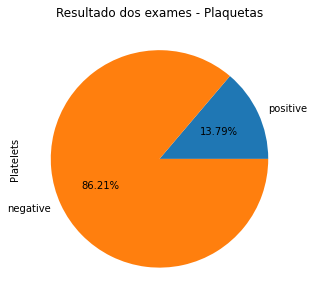

In [ ]:
#Qual a porcentagem de platelts ? 
microdadosCovidExameResult['Platelets'].plot(kind='pie', figsize=(5,5), autopct="%0.2f%%", title="Resultado dos exames - Plaquetas")

In [ ]:
microdadosCovidExameResult.dtypes

Platelets    int64
dtype: object

In [ ]:
#Remoção dos valores ausentes.
microdadosCovidExame = microdadosCovidExame.dropna()
microdadosCovidExame

,SARS-Cov-2 exam result,Platelets
1,negative,-0.517413
8,negative,1.429667
15,negative,-0.429480
18,negative,0.072992
22,negative,-0.668155
...,...,...
5602,negative,-0.102873
5614,negative,0.663397
5615,negative,-0.492289
5618,negative,-1.773594


# Neutrophils

In [6]:
exame_result_neutrophils = df['Neutrophils']
exame_result_neutrophils

0            NaN
1      -0.619086
2            NaN
3            NaN
4            NaN
          ...   
5639         NaN
5640         NaN
5641         NaN
5642         NaN
5643    0.380685
Name: Neutrophils, Length: 5644, dtype: float64

In [ ]:
#Qual a quantidade de valores repetidos ? 
exameResult = exame_result_neutrophils.value_counts()
exameResult

-0.209344    6
-1.192725    4
 1.257534    4
-0.348656    4
 0.249567    4
            ..
 2.175356    1
-0.324072    1
-1.594273    1
 1.282118    1
 1.511574    1
Name: Neutrophils, Length: 308, dtype: int64

In [ ]:
#Qual a quantidade ? 
exameResult.count()

308

In [ ]:
#Qual o valor minimo ? 
exame_result_neutrophils.min()

-3.3397746086121

In [ ]:
#Qual o valor minimo ? 
exame_result_neutrophils.max()

2.5359292030333997

In [ ]:
#Qual a media ? 
exameResult.mean()


1.6655844155844155

In [ ]:
#Descrição
exameResult.describe()


count    308.000000
mean       1.665584
std        0.903405
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: Neutrophils, dtype: float64

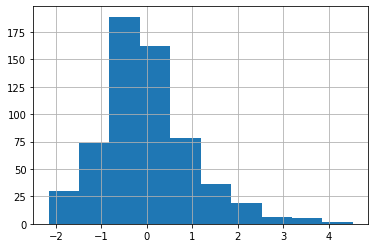

In [ ]:
#Histograma Neutrophils
exame_result_neutrophils.hist()

In [ ]:
#Selecionando colunas
colunasSelecionadas = ['SARS-Cov-2 exam result', 'Neutrophils']


In [ ]:
#Fazendo a filtragem das colunas selecionadas
microdadosCovidExame = df.filter(items=colunasSelecionadas)
microdadosCovidExame

,SARS-Cov-2 exam result,Neutrophils
0,negative,NaN
1,negative,-0.619086
2,negative,NaN
3,negative,NaN
4,negative,NaN
...,...,...
5639,positive,NaN
5640,negative,NaN
5641,negative,NaN
5642,negative,NaN


In [ ]:
microdadosCovidExame.groupby('SARS-Cov-2 exam result').count()

,Neutrophils
SARS-Cov-2 exam result,
negative,438
positive,75


In [ ]:
microdadosCovidExame.groupby('SARS-Cov-2 exam result').describe()

Neutrophils            ...                    
                             count      mean  ...       75%       max
SARS-Cov-2 exam result                        ...                    
negative                     438.0  0.015715  ...  0.714625  2.535929
positive                      75.0 -0.091775  ...  0.519997  1.888536

[2 rows x 8 columns]

SARS-Cov-2 exam result
negative    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
positive    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

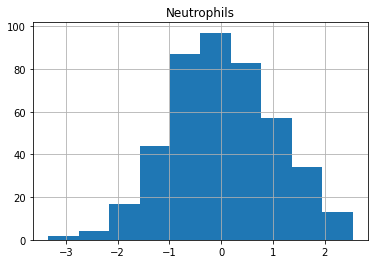

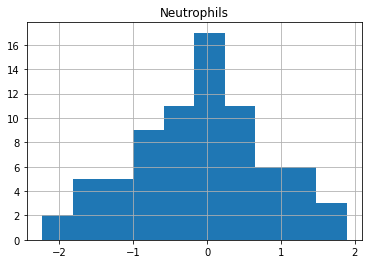

In [ ]:
microdadosCovidExame.groupby('SARS-Cov-2 exam result').hist()

In [ ]:
#Qual quantidade de neutroplils quando o exame é positive e negative ?
microdadosCovidExameResult = microdadosCovidExame.groupby('SARS-Cov-2 exam result').count().sort_values(by='Neutrophils')
microdadosCovidExameResult

,Neutrophils
SARS-Cov-2 exam result,
positive,75
negative,438


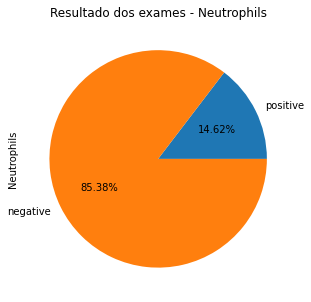

In [ ]:
#Qual quantidade de neutroplils quando o exame é positive e negative ? Gráfico
microdadosCovidExameResult['Neutrophils'].plot(kind='pie', figsize=(5,5), autopct="%0.2f%%", title="Resultado dos exames - Neutrophils")

# Monocytes

In [7]:
exame_result_monocytes = df['Monocytes']
exame_result_monocytes

0            NaN
1       0.357547
2            NaN
3            NaN
4            NaN
          ...   
5639         NaN
5640         NaN
5641         NaN
5642         NaN
5643    0.567652
Name: Monocytes, Length: 5644, dtype: float64

In [8]:
#Qual a quantidade de valores repetidos ? 
exameResult = exame_result_monocytes.value_counts()
exameResult

-1.008140    23
-0.482876    23
-0.088928    15
-0.456613    13
-1.270772    12
             ..
 1.408075     1
 1.959602     1
 3.640448     1
 4.507133     1
 2.957604     1
Name: Monocytes, Length: 146, dtype: int64

In [9]:
#Qual a quantidade ? 
exameResult.count()

146

In [10]:
#Qual a media ? 
exameResult.mean()

4.116438356164384

In [11]:
#Qual o valor minimo ? 
exame_result_monocytes.min()

-2.1637213230133

In [12]:
#Qual o valor maximo ? 
exame_result_monocytes.max()

4.5333971977234

In [13]:
#Descrição
exameResult.describe()

count    146.000000
mean       4.116438
std        3.847991
min        1.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       23.000000
Name: Monocytes, dtype: float64

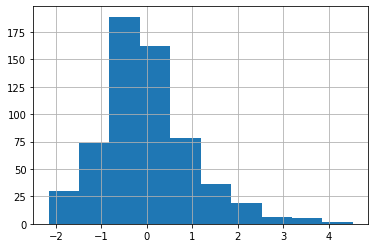

In [14]:
#Histograma
exame_result_monocytes.hist()

In [15]:
#Selecionando colunas
colunasSelecionadas = ['SARS-Cov-2 exam result', 'Monocytes']

In [16]:
#Fazendo a filtragem das colunas selecionadas
microdadosCovidExame = df.filter(items=colunasSelecionadas)
microdadosCovidExame

,SARS-Cov-2 exam result,Monocytes
0,negative,NaN
1,negative,0.357547
2,negative,NaN
3,negative,NaN
4,negative,NaN
...,...,...
5639,positive,NaN
5640,negative,NaN
5641,negative,NaN
5642,negative,NaN


In [17]:
microdadosCovidExame.groupby('SARS-Cov-2 exam result').count()

,Monocytes
SARS-Cov-2 exam result,
negative,518
positive,83


In [18]:
#Qual quantidade de Monocytes quando o exame é positive e negative ?
microdadosCovidExameResult = microdadosCovidExame.groupby('SARS-Cov-2 exam result').count().sort_values(by='Monocytes')
microdadosCovidExameResult

,Monocytes
SARS-Cov-2 exam result,
positive,83
negative,518


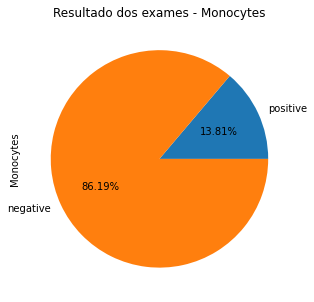

In [19]:
#Qual quantidade de Monocytes quando o exame é positive e negative ? Gráfico
microdadosCovidExameResult['Monocytes'].plot(kind='pie', figsize=(5,5), autopct="%0.2f%%", title="Resultado dos exames - Monocytes")

# Red blood cells

In [20]:
exame_result_red_blood_cells = df['Red blood Cells']
exame_result_red_blood_cells

0            NaN
1       0.102004
2            NaN
3            NaN
4            NaN
          ...   
5639         NaN
5640         NaN
5641         NaN
5642         NaN
5643    0.578024
Name: Red blood Cells, Length: 5644, dtype: float64

In [21]:
#Qual a quantidade de valores repetidos ? 
exameResult = exame_result_red_blood_cells.value_counts()
exameResult

-0.567950    10
-0.127191     9
-0.215342     9
-0.779514     9
 0.366460     8
             ..
-2.031269     1
-1.837335     1
 1.688736     1
 2.023713     1
 1.988453     1
Name: Red blood Cells, Length: 211, dtype: int64

In [22]:
#Qual a quantidade ? 
exameResult.count()

211

In [23]:
#Qual a media ? 
exameResult.mean()

2.853080568720379

In [24]:
#Qual o valor minimo ? 
exame_result_monocytes.min()

-2.1637213230133

In [25]:
#Qual o valor maximo ? 
exame_result_monocytes.max()

4.5333971977234

In [26]:
#Descrição
exameResult.describe()

count    211.000000
mean       2.853081
std        2.042927
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       10.000000
Name: Red blood Cells, dtype: float64

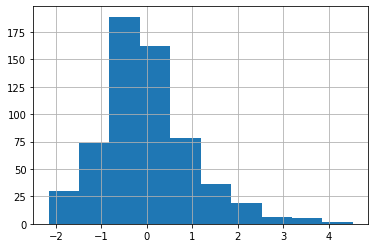

In [27]:
#Histograma
exame_result_monocytes.hist()

In [28]:
#Selecionando colunas
colunasSelecionadas = ['SARS-Cov-2 exam result', 'Red blood Cells']

In [29]:
#Fazendo a filtragem das colunas selecionadas
microdadosCovidExame = df.filter(items=colunasSelecionadas)
microdadosCovidExame

,SARS-Cov-2 exam result,Red blood Cells
0,negative,NaN
1,negative,0.102004
2,negative,NaN
3,negative,NaN
4,negative,NaN
...,...,...
5639,positive,NaN
5640,negative,NaN
5641,negative,NaN
5642,negative,NaN


In [30]:
#Qual quantidade de Red blood Cells quando o exame é positive e negative ?
microdadosCovidExameResult = microdadosCovidExame.groupby('SARS-Cov-2 exam result').count().sort_values(by='Red blood Cells')
microdadosCovidExameResult

,Red blood Cells
SARS-Cov-2 exam result,
positive,83
negative,519


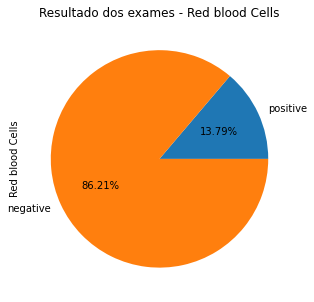

In [31]:
#Qual quantidade de Red blood Cells quando o exame é positive e negative ? Gráfico
microdadosCovidExameResult['Red blood Cells'].plot(kind='pie', figsize=(5,5), autopct="%0.2f%%", title="Resultado dos exames - Red blood Cells")

# Urine - Red blood cells

In [32]:
exame_result_Urine_Red_blood_cells = df['Urine - Red blood cells']
exame_result_Urine_Red_blood_cells

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5639         NaN
5640         NaN
5641         NaN
5642   -0.177169
5643         NaN
Name: Urine - Red blood cells, Length: 5644, dtype: float64

In [35]:
#Qual a media ? 
exame_result_Urine_Red_blood_cells.mean()

7.557017311524535e-09

In [33]:
#Qual a quantidade de valores repetidos ? 
exameResult = exame_result_Urine_Red_blood_cells.value_counts()
exameResult

-0.202297    19
-0.200203     7
-0.191827     5
-0.193921     4
-0.196015     4
-0.181357     2
-0.179263     2
-0.187639     2
-0.198109     2
-0.103878     1
-0.137383     1
-0.126913     1
-0.185545     1
-0.149947     1
-0.085032     1
-0.147853     1
 0.432191     1
 2.000613     1
-0.177169     1
-0.172981     1
 1.538882     1
-0.141571     1
-0.156229     1
-0.129007     1
-0.163767     1
-0.091314     1
 0.136934     1
-0.198947     1
-0.189733     1
 7.821993     1
-0.154135     1
-0.162511     1
Name: Urine - Red blood cells, dtype: int64

In [34]:
#Qual a quantidade ? 
exameResult.count()

32

In [36]:
#Qual a media ? 
exameResult.mean()

2.1875

In [37]:
#Qual o valor minimo ? 
exame_result_Urine_Red_blood_cells.min()

-0.20229743421078

In [38]:
#Qual o valor maximo ? 
exame_result_Urine_Red_blood_cells.max()

7.821993350982701

In [39]:
#Descrição
exameResult.describe()

count    32.00000
mean      2.18750
std       3.37388
min       1.00000
25%       1.00000
50%       1.00000
75%       2.00000
max      19.00000
Name: Urine - Red blood cells, dtype: float64

In [40]:
exame_result_Urine_Red_blood_cells.describe()


count    7.000000e+01
mean     7.557017e-09
std      1.007220e+00
min     -2.022974e-01
25%     -2.022974e-01
50%     -1.939214e-01
75%     -1.660709e-01
max      7.821993e+00
Name: Urine - Red blood cells, dtype: float64

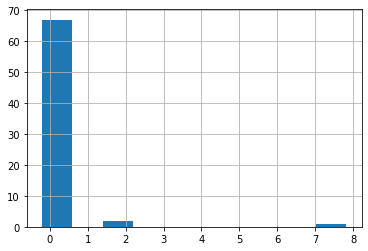

In [42]:
#Histograma
exame_result_Urine_Red_blood_cells.hist()

In [44]:
#Selecionando colunas
colunasSelecionadas = ['SARS-Cov-2 exam result', 'Urine - Red blood cells']

In [46]:
#Fazendo a filtragem das colunas selecionadas
microdadosCovidExame = df.filter(items=colunasSelecionadas)
microdadosCovidExame

,SARS-Cov-2 exam result,Urine - Red blood cells
0,negative,NaN
1,negative,NaN
2,negative,NaN
3,negative,NaN
4,negative,NaN
...,...,...
5639,positive,NaN
5640,negative,NaN
5641,negative,NaN
5642,negative,-0.177169


In [48]:
#Qual quantidade de Urine - Red blood cells quando o exame é positive e negative ?
microdadosCovidExameResult = microdadosCovidExame.groupby('SARS-Cov-2 exam result').count().sort_values(by='Urine - Red blood cells')
microdadosCovidExameResult

,Urine - Red blood cells
SARS-Cov-2 exam result,
positive,12
negative,58


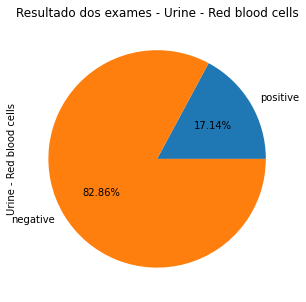

In [49]:
#Qual quantidade de Urine - Red blood cells quando o exame é positive e negative ? Gráfico
microdadosCovidExameResult['Urine - Red blood cells'].plot(kind='pie', figsize=(5,5), autopct="%0.2f%%", title="Resultado dos exames - Urine - Red blood cells")

# Dados Importantes

In [ ]:
neutrophils
monocytes
red blood cells
Urine - Red blood cells
